# WeatherPy


In [76]:
#Observations
#1. Scatter plot for cloudiness vs latitude is very spread out and doesn't show that their is a relationship between these factors. 
#2.Latitude vs Temperature plot shows that there is strong relationship between latitude and temperature near the equator.
#3.Windspeed vs Latitude plot was also very spreads out and doesn't show that their is a relationship between these factors.

In [77]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [78]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
from Config import api_key

#incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

#Outout csv file
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
long_range = (-180, 180)

# List of Cities

In [4]:
 # List for holding lat_lngs and cities, n is how many cities to generate

lat_longs = []
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low= -90, high= 90, size=600)
long = np.random.uniform(low= -90, high= 90, size=600)
lat_longs = zip(lat,long)

# Identify nearest city for each lat, lng combination
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

300

In [5]:
# Create base URL and indicate imperial units

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+api_key+"&q="
units = "imperial"

In [6]:
# Build partial query URL
#query = f"{url}appid={api_key}&units={units}&q="

In [7]:
#values to extract

cities_list = []
country = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
dates = []


In [8]:
#Loop to get information for cities
from Config import api_key

for city in cities:
    time.sleep(1)  
    url_2 = url + city
    response = requests.get(url_2).json()
    try:
        if response["message"] == "city not found":
            print("City not found")
            
    except:
        print(city)  
        cities_list.append(city)
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])

print()

City not found
dingle
busselton
bengkulu
salalah
City not found
saint-philippe
City not found
saint george
bredasdorp
tignere
sao joao da barra
City not found
georgetown
abu kamal
port alfred
morondava
alexandria
sorland
kruisfontein
hermanus
sioux lookout
cape town
benicarlo
sakakah
City not found
lebu
ushuaia
bubaque
uige
coxim
port-gentil
chicama
ancud
nizhnyaya salda
aripuana
uribia
longyearbyen
luderitz
mar del plata
kidal
carauari
nador
faya
manjacaze
liwale
dikson
cidreira
miraflores
qaanaaq
puerto carreno
san cristobal
lagunas
mikkeli
ponta do sol
port elizabeth
ostersund
trapani
salinopolis
souillac
City not found
punta arenas
lakshettipet
viedma
ndele
City not found
olafsvik
tarko-sale
cayenne
turukhansk
newport
abu dhabi
torbay
ilulissat
City not found
antofagasta
vardo
east london
alcaniz
oranjemund
City not found
contamana
touros
potsdam
tasiilaq
City not found
kutum
kikwit
novyy urengoy
adrar
nampula
snezhnogorsk
palmerston
qaqortoq
klaksvik
kavaratti
radnevo
ostrovnoy
ja

In [19]:
#Dictionary for weather data
data = {"city": cities_list, "cloudiness":cloudiness, "country": country, "dates": dates, "humidity":humidity, "latitude": latitude, "longitude": longitude, "temperature": temperature, "windspeed": windspeed
       }
#dictionary to dataframe

weather = pd.DataFrame(data)
weather.to_csv(output_data_file, index=None, header=True)
weather.head(10)

,city,cloudiness,country,dates,humidity,latitude,longitude,temperature,windspeed
0,dingle,31,PH,1619759754,39,10.9995,122.6711,92.21,7.23
1,busselton,45,AU,1619759755,78,-33.6500,115.3333,62.01,1.99
2,bengkulu,98,ID,1619759757,78,-3.8004,102.2655,81.64,5.66
3,salalah,40,OM,1619759362,74,17.0151,54.0924,86.00,10.36
4,saint-philippe,0,RE,1619759761,74,-21.3585,55.7679,80.60,20.71
5,saint george,1,US,1619759764,18,37.1041,-113.5841,73.99,4.61
6,bredasdorp,5,ZA,1619759766,87,-34.5322,20.0403,50.00,5.75
7,tignere,95,CM,1619759768,69,7.3667,12.6500,65.82,2.62
8,sao joao da barra,56,BR,1619759769,87,-21.6403,-41.0511,66.58,12.03
9,georgetown,20,MY,1619759484,70,5.4112,100.3354,87.80,4.61


# ScatterPlots


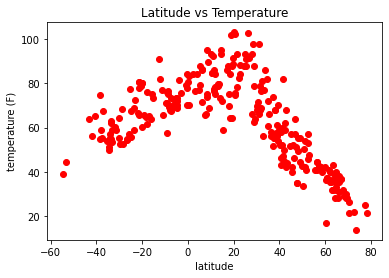

In [28]:
#Temperature (F) vs. Latitude
plt.scatter(weather["latitude"], weather["temperature"], c="red")
plt.xlabel("latitude")
plt.ylabel("temperature (F)")
plt.title( "Latitude vs Temperature")
plt.savefig("output_data/temp.png")
plt.show()



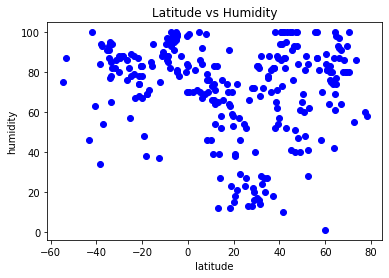

In [29]:
#Humidity (%) vs. Latitude
plt.scatter(weather["latitude"], weather["humidity"], c="blue")
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title( "Latitude vs Humidity")
plt.savefig("output_data/humid.png")
plt.show()


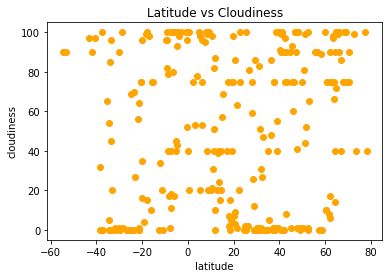

In [30]:
#Cloudiness (%) vs. Latitude

plt.scatter(weather["latitude"], weather["cloudiness"], c="orange")
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title( "Latitude vs Cloudiness")
plt.savefig("output_data/cloud.png")
plt.show()

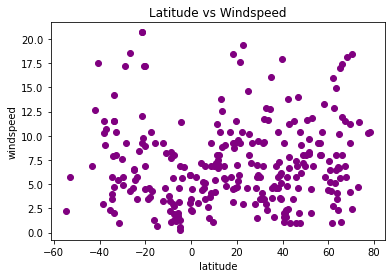

In [31]:
#Wind Speed (mph) vs. Latitude

plt.scatter(weather["latitude"], weather["windspeed"], c="purple")
plt.xlabel("latitude")
plt.ylabel("windspeed")
plt.title( "Latitude vs Windspeed")
plt.savefig("output_data/Wind.png")
plt.show()


# Linear Regression

### Northern Hemisphere

The correlation between latitude and temperature is -0.87


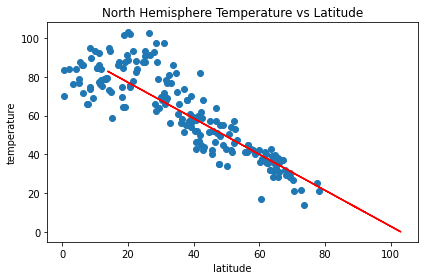

In [62]:
#Northern Hemisphere - Temperature (F) vs. Latitude
import scipy.stats as st
north_hemisphere = weather.loc[weather["latitude"] >= 0]
south_hemisphere = weather.loc[weather["latitude"] < 0]
    
correlation = round(st.pearsonr(north_hemisphere["latitude"], north_hemisphere["temperature"])[0],2)
print(f"The correlation between latitude and temperature is {correlation}")
graph = st.linregress(north_hemisphere["latitude"], north_hemisphere["temperature"])
y_values = north_hemisphere["temperature"]*graph[0]+graph[1]

plt.scatter(north_hemisphere["latitude"],north_hemisphere["temperature"])
plt.plot(north_hemisphere["temperature"],y_values,color='red')
plt.xlabel("latitude")
plt.ylabel("temperature")
plt.title("North Hemisphere Temperature vs Latitude")
plt.tight_layout()
plt.savefig("output_data/north_hem_temp_lat.png")

The correlation between latitude and humidity is 0.24


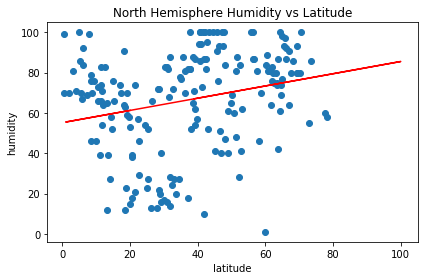

In [69]:
#Northern Hemisphere - Humidity (%) vs. Latitude
correlation = round(st.pearsonr(north_hemisphere["latitude"], north_hemisphere["humidity"])[0],2)
print(f"The correlation between latitude and humidity is {correlation}")
graph = st.linregress(north_hemisphere["latitude"], north_hemisphere["humidity"])
y_values = north_hemisphere["humidity"]*graph[0]+graph[1]

plt.scatter(north_hemisphere["latitude"],north_hemisphere["humidity"])
plt.plot(north_hemisphere["humidity"],y_values,color='red')
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("North Hemisphere Humidity vs Latitude")
plt.tight_layout()
plt.savefig("output_data/north_hem_humid_lat.png")



The correlation between latitude and cloudiness is 0.19


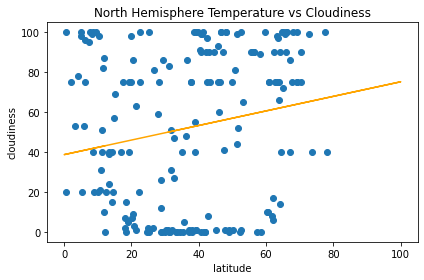

In [70]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude
correlation = round(st.pearsonr(north_hemisphere["latitude"], north_hemisphere["cloudiness"])[0],2)
print(f"The correlation between latitude and cloudiness is {correlation}")
graph = st.linregress(north_hemisphere["latitude"], north_hemisphere["cloudiness"])
y_values = north_hemisphere["cloudiness"]*graph[0]+graph[1]

plt.scatter(north_hemisphere["latitude"],north_hemisphere["cloudiness"])
plt.plot(north_hemisphere["cloudiness"],y_values,color='orange')
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title("North Hemisphere Temperature vs Cloudiness")
plt.tight_layout()
plt.savefig("output_data/north_hem_cloud_lat.png")

The correlation between latitude and windspeed is 0.14


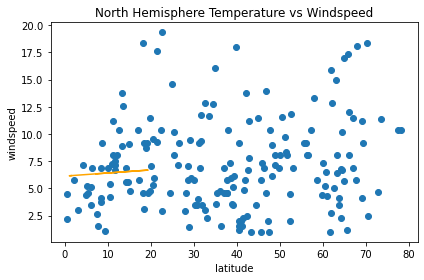

In [71]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
correlation = round(st.pearsonr(north_hemisphere["latitude"], north_hemisphere["windspeed"])[0],2)
print(f"The correlation between latitude and windspeed is {correlation}")
graph = st.linregress(north_hemisphere["latitude"], north_hemisphere["windspeed"])
y_values = north_hemisphere["windspeed"]*graph[0]+graph[1]

plt.scatter(north_hemisphere["latitude"],north_hemisphere["windspeed"])
plt.plot(north_hemisphere["windspeed"],y_values,color='orange')
plt.xlabel("latitude")
plt.ylabel("windspeed")
plt.title("North Hemisphere Temperature vs Windspeed")
plt.tight_layout()
plt.savefig("output_data/north_hem_wind_lat.png")

### Southern Hemisphere

The correlation between latitude and temperature is 0.69


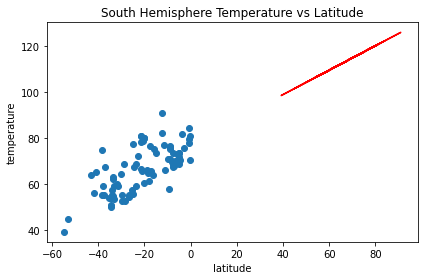

In [72]:
#Southern Hemisphere - Temperature (F) vs. Latitude
correlation = round(st.pearsonr(south_hemisphere["latitude"], south_hemisphere["temperature"])[0],2)
print(f"The correlation between latitude and temperature is {correlation}")
graph = st.linregress(south_hemisphere["latitude"], south_hemisphere["temperature"])
y_values = south_hemisphere["temperature"]*graph[0]+graph[1]

plt.scatter(south_hemisphere["latitude"],south_hemisphere["temperature"])
plt.plot(south_hemisphere["temperature"],y_values,color='red')
plt.xlabel("latitude")
plt.ylabel("temperature")
plt.title("South Hemisphere Temperature vs Latitude")
plt.tight_layout()
plt.savefig("output_data/south_hem_temp_lat.png")

The correlation between latitude and humidity is 0.24


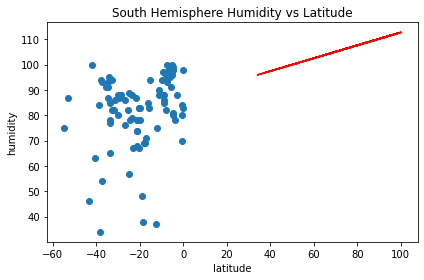

In [73]:
#Southern Hemisphere - Humidity (%) vs. Latitude
correlation = round(st.pearsonr(south_hemisphere["latitude"], south_hemisphere["humidity"])[0],2)
print(f"The correlation between latitude and humidity is {correlation}")
graph = st.linregress(south_hemisphere["latitude"], south_hemisphere["humidity"])
y_values = south_hemisphere["humidity"]*graph[0]+graph[1]

plt.scatter(south_hemisphere["latitude"],south_hemisphere["humidity"])
plt.plot(south_hemisphere["humidity"],y_values,color='red')
plt.xlabel("latitude")
plt.ylabel("humidity")
plt.title("South Hemisphere Humidity vs Latitude")
plt.tight_layout()
plt.savefig("output_data/south_hem_humid_lat.png")

The correlation between latitude and cloudiness is 0.22


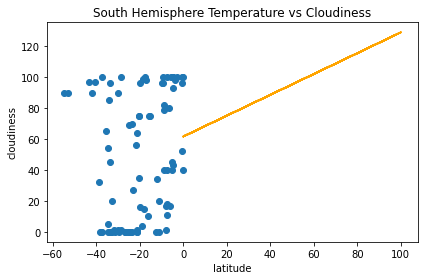

In [74]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude
correlation = round(st.pearsonr(south_hemisphere["latitude"], south_hemisphere["cloudiness"])[0],2)
print(f"The correlation between latitude and cloudiness is {correlation}")
graph = st.linregress(south_hemisphere["latitude"], south_hemisphere["cloudiness"])
y_values = south_hemisphere["cloudiness"]*graph[0]+graph[1]

plt.scatter(south_hemisphere["latitude"],south_hemisphere["cloudiness"])
plt.plot(south_hemisphere["cloudiness"],y_values,color='orange')
plt.xlabel("latitude")
plt.ylabel("cloudiness")
plt.title("South Hemisphere Temperature vs Cloudiness")
plt.tight_layout()
plt.savefig("output_data/south_hem_cloud_lat.png")

The correlation between latitude and windspeed is -0.31


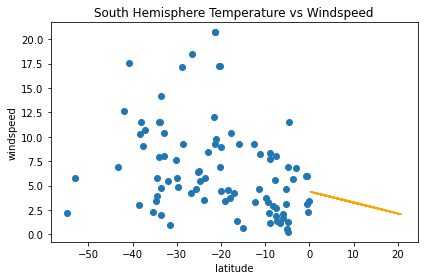

In [75]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude
correlation = round(st.pearsonr(south_hemisphere["latitude"], south_hemisphere["windspeed"])[0],2)
print(f"The correlation between latitude and windspeed is {correlation}")
graph = st.linregress(south_hemisphere["latitude"], south_hemisphere["windspeed"])
y_values = south_hemisphere["windspeed"]*graph[0]+graph[1]

plt.scatter(south_hemisphere["latitude"],south_hemisphere["windspeed"])
plt.plot(south_hemisphere["windspeed"],y_values,color='orange')
plt.xlabel("latitude")
plt.ylabel("windspeed")
plt.title("South Hemisphere Temperature vs Windspeed")
plt.tight_layout()
plt.savefig("output_data/south_hem_wind_lat.png")